In [1]:
# Import Required Libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# Import Dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [5]:
# Examine datatypes
df_market_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Initialize
scaler = StandardScaler()

# Fit
scaler.fit(df_market_data)

# Predict/Transform
# Create a DataFrame with the scaled data
scaled_data = scaler.transform(df_market_data)
df_market_data_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)
df_market_data_scaled.index = df_market_data.index # Set the coin_id column as index

# Display sample data
df_market_data_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Define "X" (features to predict)
X = df_market_data_scaled

In [8]:
# Create an empty list to store the inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a list to store the values of k
k = list(range(2, 20))

# Create a for-loop where each value of k is evaluated using the K-means algorithm (compute the inertia with each possible value of k)
for i in k:
    # 1. Create a KMeans model using the loop counter for the n_clusters (initialize the model)
    k_model = KMeans(n_clusters=i, random_state=1)

    # 2. Fit the model to the data using `df_market_data_scaled`
    k_model.fit(X)

    # Predict the model
    preds = k_model.predict(X)

    # 3. Append the model.inertia_ to the inertia list (append the computed inertia from the KMeans model)
    # Evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)

    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)

    # Print results
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 19
Finished 3 out of 19
Finished 4 out of 19
Finished 5 out of 19
Finished 6 out of 19
Finished 7 out of 19
Finished 8 out of 19
Finished 9 out of 19
Finished 10 out of 19
Finished 11 out of 19
Finished 12 out of 19
Finished 13 out of 19
Finished 14 out of 19
Finished 15 out of 19
Finished 16 out of 19
Finished 17 out of 19
Finished 18 out of 19
Finished 19 out of 19


In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}

# Create a DataFrame with the data to plot the Elbow curve (holds the values for k and the corresponding inertia)
df_elbow = pd.DataFrame(elbow_data)
# Acceleration included
df_elbow["acc"] = df_elbow.inertia.diff()

# Review the DataFrame
df_elbow.head(20)

,k,inertia,silhouette_score,cha_score,acc
0,2,212.123342,0.690885,13.766470,NaN
1,3,165.136752,0.260810,14.021117,-46.986590
2,4,79.022435,0.314482,32.459853,-86.114317
3,5,66.413051,0.323913,29.892958,-12.609385
4,6,61.634088,0.251616,25.595599,-4.778963
5,7,46.074467,0.258868,29.631263,-15.559621
6,8,43.392694,0.252185,26.466078,-2.681773
7,9,32.913223,0.260185,30.879599,-10.479471
8,10,30.469111,0.168099,29.000071,-2.444111
9,11,26.480101,0.175935,29.514981,-3.989010


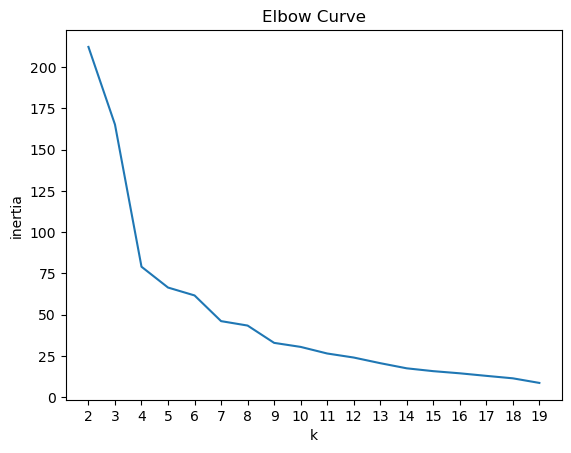

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot the DataFrame
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** k = 4, highest Variance Ratio, steepest Elbow point, good Silhouette score

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Make a copy of original df
df_sub = df_market_data_scaled.copy()

In [12]:
# Initialize the K-Means model using the best value for k and random_state of 1 
model = KMeans(n_clusters=4, random_state=1)

In [13]:
# Fit the K-Means model using the scaled data
model.fit(X)

KMeans(n_clusters=4, random_state=1)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
preds = model.predict(X)

# Print the resulting array of cluster values.
print(preds)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [15]:
# Create a copy of the DataFrame
df_sub2 = df_sub.copy()

In [16]:
# Add a new column to the DataFrame with the predicted clusters
df_sub2['clusters'] = preds

# Display sample data
df_sub2.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [17]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_sub2.reset_index().hvplot.scatter(
    width=800,
    height=400,
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    color="clusters",
    hover_cols="coin_id"
)

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Examine correlation
corrs = df_market_data_scaled.corr()
corrs

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,1.000000,0.169659,0.279682,0.292563,0.136974,-0.541190,-0.750630
price_change_percentage_7d,0.169659,1.000000,0.538294,0.056899,-0.145099,-0.052533,-0.038424
price_change_percentage_14d,0.279682,0.538294,1.000000,0.658040,0.376108,-0.039086,-0.116632
price_change_percentage_30d,0.292563,0.056899,0.658040,1.000000,0.745248,0.324777,0.016078
price_change_percentage_60d,0.136974,-0.145099,0.376108,0.745248,1.000000,0.499102,0.211242
price_change_percentage_200d,-0.541190,-0.052533,-0.039086,0.324777,0.499102,1.000000,0.879873
price_change_percentage_1y,-0.750630,-0.038424,-0.116632,0.016078,0.211242,0.879873,1.000000


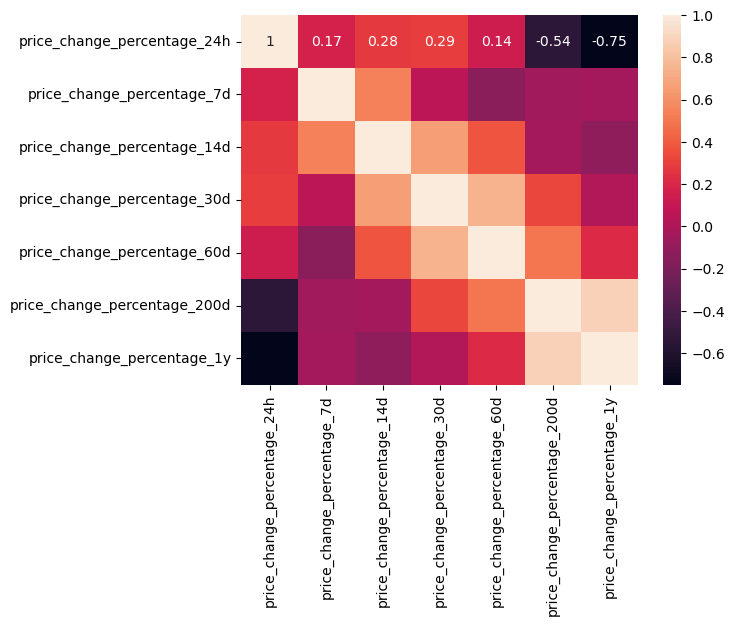

In [19]:
# Display correlation as heatmap
sns.heatmap(corrs, annot=True)
plt.show()

In [20]:
# There is multi-collinearity (data is afflicted)

# Init
n_components = len(df_market_data_scaled.columns)
pca=PCA(n_components=n_components)

# Fit the PCA model on the transformed DataFrame
pca_data = pca.fit_transform(df_market_data_scaled)
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])

# Display sample data
df_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
0,-0.600667,0.842760,0.461595,-0.109151,-0.033786,-0.225703,0.006595
1,-0.458261,0.458466,0.952877,0.095100,0.014588,0.034158,0.109593
2,-0.433070,-0.168126,-0.641752,-0.470282,0.115300,-0.127710,-0.086857
3,-0.471835,-0.222660,-0.479053,-0.737473,-0.148641,-0.273472,0.134870
4,-1.157800,2.041209,1.859715,0.236479,-0.191787,-0.411513,-0.070411


In [21]:
# Create a PCA model instance and set `n_components=3`.
n_components = 3

In [22]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca=PCA(n_components=n_components)

# Fit the PCA model on the transformed cryptocurrency DataFrame
pca_data = pca.fit_transform(df_market_data_scaled)

# View the first five rows of the DataFrame. 
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])
df_pca.index = df_market_data_scaled.index

# Display sample data
df_pca.head()

,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [23]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [24]:
# Total explained variance of the three principal components
total_explained_variance = sum(pca.explained_variance_ratio_)
total_explained_variance

0.8950316570309841

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89%

---

### Find the Best Value for k Using the PCA Data

In [25]:
# Define "X" (features to predict)
X = df_pca

In [26]:
# Create an empty list to store the inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a list to store the values of k
k = list(range(2, 20))

# Create a for-loop where each value of k is evaluated using the K-means algorithm (compute the inertia with each possible value of k)
for i in k:
    # 1. Create a KMeans model using the loop counter for the n_clusters (initialize the model)
    k_model = KMeans(n_clusters=i, random_state=1)

    # 2. Fit the model to the data using `df_market_data_scaled`
    k_model.fit(X)

    # Predict the model
    preds = k_model.predict(X)

    # 3. Append the model.inertia_ to the inertia list (append the computed inertia from the KMeans model)
    # Evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)

    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)

    # Print results
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 19
Finished 3 out of 19
Finished 4 out of 19
Finished 5 out of 19
Finished 6 out of 19
Finished 7 out of 19
Finished 8 out of 19
Finished 9 out of 19
Finished 10 out of 19
Finished 11 out of 19
Finished 12 out of 19
Finished 13 out of 19
Finished 14 out of 19
Finished 15 out of 19
Finished 16 out of 19
Finished 17 out of 19
Finished 18 out of 19
Finished 19 out of 19


In [27]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}

# Create a DataFrame with the data to plot the Elbow curve (holds the values for k and the corresponding inertia)
df_elbow_pca = pd.DataFrame(elbow_data)
# Acceleration included
df_elbow_pca["acc"] = df_elbow_pca.inertia.diff()

# Review the DataFrame
df_elbow_pca.head(20)

,k,inertia,silhouette_score,cha_score,acc
0,2,182.339530,0.728406,15.941950,NaN
1,3,135.442408,0.356130,17.034560,-46.897122
2,4,49.665497,0.420800,51.455694,-85.776911
3,5,38.672582,0.405662,50.780512,-10.992914
4,6,34.507577,0.334511,45.107936,-4.165006
5,7,23.728365,0.375378,55.678472,-10.779212
6,8,18.574523,0.316385,60.481348,-5.153841
7,9,15.572672,0.323751,61.980734,-3.001851
8,10,11.407667,0.350621,74.116423,-4.165006
9,11,8.058822,0.361557,92.624679,-3.348845


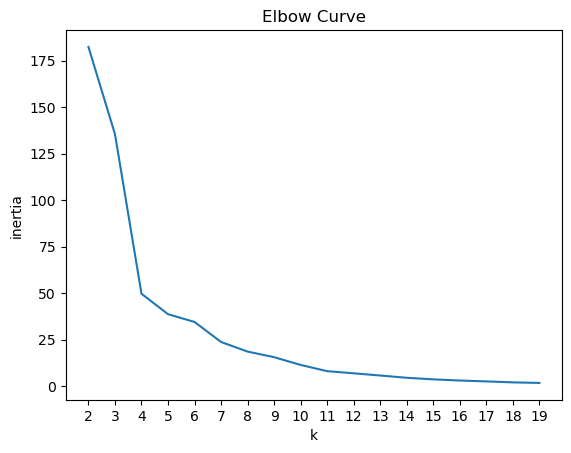

In [28]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot the DataFrame
plt.plot(df_elbow_pca["k"], df_elbow_pca["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow_pca["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** k = 4, higher Variance Ratio, steepest Elbow point, higher Silhouette score


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** k value appears to be the same as the original data

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [29]:
# Make a copy of pca df
df_sub3 = df_pca.copy()

In [30]:
# Initialize the K-Means model using the best value for k and random_state of 1 
model = KMeans(n_clusters=4, random_state=1)

In [31]:
# Fit the K-Means model using the PCA data
model.fit(X)

KMeans(n_clusters=4, random_state=1)

In [32]:
# Predict the clusters to group the cryptocurrencies using the PCA data
preds = model.predict(X)

# Print the resulting array of cluster values.
print(preds)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [33]:
# Create a copy of the DataFrame with the PCA data
df_sub4 = df_sub3.copy()

# Add a new column to the DataFrame with the predicted clusters
df_sub4['clusters'] = preds

# Display sample data
df_sub4.head()

,PCA_1,PCA_2,PCA_3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [34]:
# Create a scatter plot using hvPlot by setting 
# `x="PCA_1"` and `y="PCA_2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_sub4.reset_index().hvplot.scatter(
    width=800,
    height=400,
    x="PCA_1",
    y="PCA_2",
    color="clusters",
    hover_cols="coin_id"
)

:Scatter   [PCA_1]   (PCA_2,clusters,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [35]:
# Composite plot to contrast the Elbow curves
elbow_plot = df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve Using Original Data", xticks=k)
elbow_plot_pca = df_elbow_pca.hvplot.line(x="k", y="inertia", title="Elbow Curve Using PCA Data", xticks=k)

elbow_plot + elbow_plot_pca

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [36]:
# Composite plot to contrast the clusters
cluster_plot = df_elbow.hvplot.scatter(x="k", y="inertia", title="Clusters Using Original Data", xticks=k)
cluster_plot_pca = df_elbow_pca.hvplot.scatter(x="k", y="inertia", title="Clusters Using PCA Data", xticks=k)

cluster_plot + cluster_plot_pca

:Layout
   .Scatter.I  :Scatter   [k]   (inertia)
   .Scatter.II :Scatter   [k]   (inertia)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 